In [5]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr, gaussian_kde
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [8]:
# Load data

composite = np.log10(
    pd.read_csv(
        "/Users/adamhe/github/scratch/qtl_metrics/tiqtl/tiqtls_l2_scores_ref_model.csv.gz",
        index_col=0,
        header=None
    ) 
    + 1e-3
)
composite.columns = ["expt", "pred"]
composite.shape

(2057, 2)

In [12]:
print((composite.pred == np.log10(1e-3)).mean())
print((composite.pred == np.log10(1e-3)).sum())

0.1701507049100632
350


In [17]:
print(pearsonr(composite.pred, composite.expt))

PearsonRResult(statistic=0.3724831205013049, pvalue=1.0510898560714374e-68)


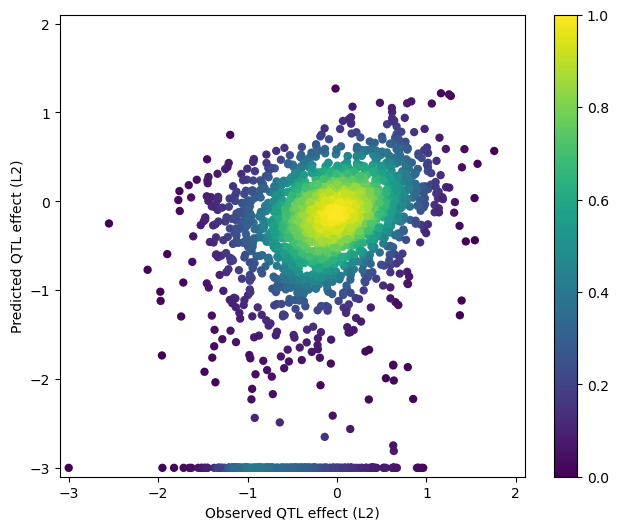

In [18]:
# Plot composite log L2 ref - alt scores

fig = plt.figure(figsize=(7.5, 6))
ax = fig.add_subplot(1, 1, 1)
ax = sns.scatterplot(
    data=composite,
    x="expt",
    y="pred",
    c=gaussian_kde(composite.transpose())(composite.transpose()),
    cmap="viridis",
    alpha=1,
    linewidth=0,
)
ax.set_xlabel("Observed QTL effect (L2)")
ax.set_ylabel("Predicted QTL effect (L2)")
ax.set_xlim(-3.1, 2.1)
ax.set_ylim(-3.1, 2.1)
sm = plt.cm.ScalarMappable(cmap="viridis")
ax.figure.colorbar(sm, ax=ax)

plt.savefig("img/tiqtl_composite_l2.pdf")

In [19]:
print(pearsonr(composite.expt, composite.pred))
print(spearmanr(composite.expt, composite.pred))

PearsonRResult(statistic=0.3724831205013049, pvalue=1.0510898560714374e-68)
SignificanceResult(statistic=0.3923281510159497, pvalue=1.1619717060850944e-76)
